#  California Dataset

Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


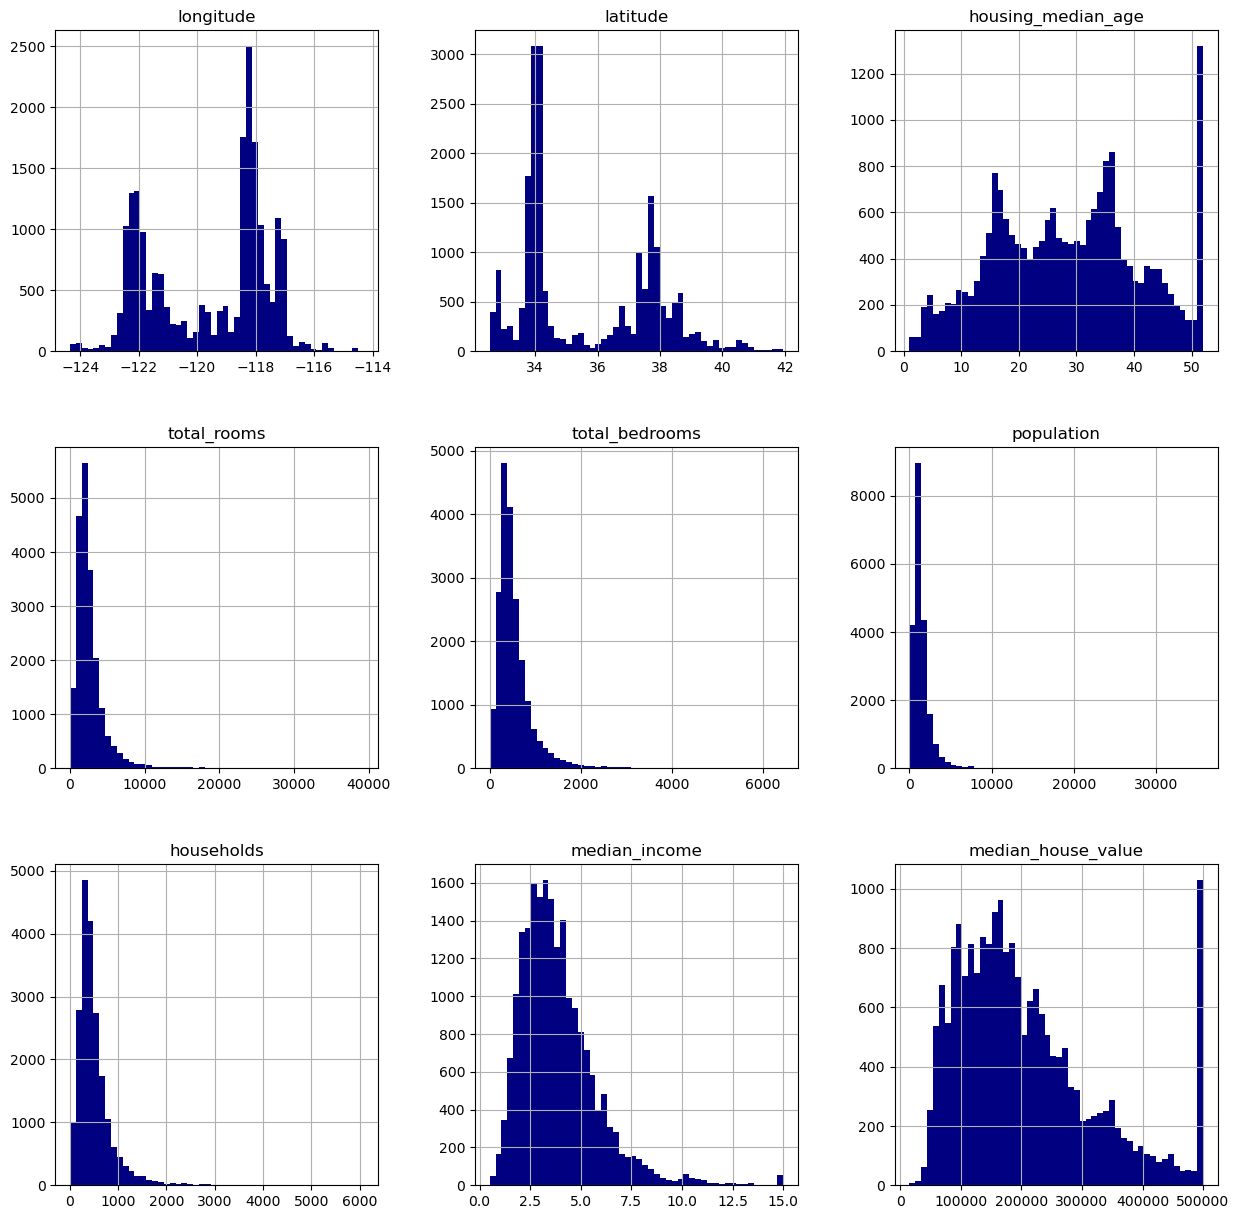

In [25]:
df=pd.read_excel("housing.xlsx") # To read the excel file 
df.hist(bins=50,color='navy',figsize=(15,15))
df.info()

Here we can see that all the datatype is float and int except for the ocean proximity which is object.

2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

In [3]:
median_income=df["median_income"].mean()  # To calculate the average of of median income 
median_income

3.8706710029070246

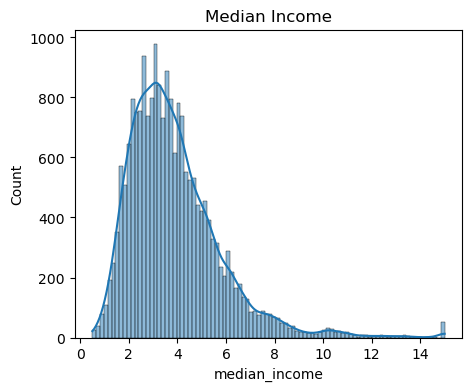

In [4]:
plt.figure(figsize=(5,4))   # selecting figure size 
sns.histplot(df['median_income'],kde=True,edgecolor='black')  # using seaborn to plot the median in come 
plt.title("Median Income")  # To give the title
plt.show()

Majority of data is present on the left side and elongated tail right side so it is right skewed
more than one mode is present 

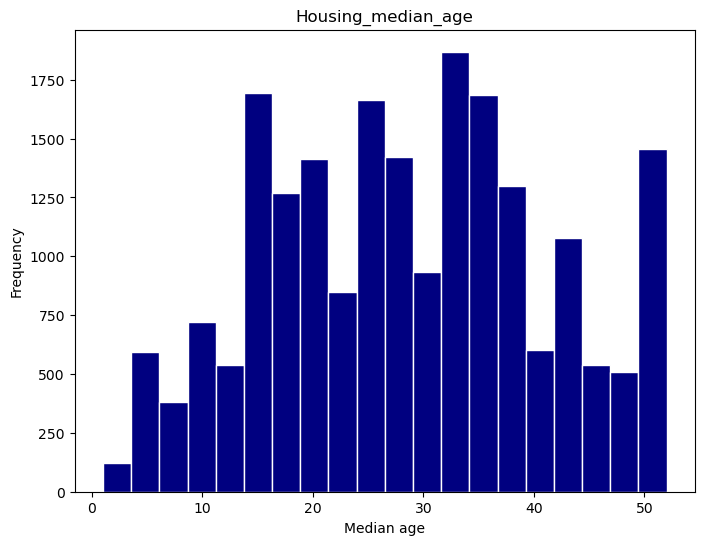

In [5]:
median_house_value=df["housing_median_age"]
plt.figure(figsize=(8,6))
plt.hist(df["housing_median_age"],bins=20,color="navy",edgecolor="w") # Plotted the histogram
plt.title("Housing_median_age")
plt.xlabel("Median age")
plt.ylabel("Frequency")
plt.show()

The data is normally distributed so housing median age is symmetrical 

3. Show with the help of visualization, how median_income and median_house_values are related?

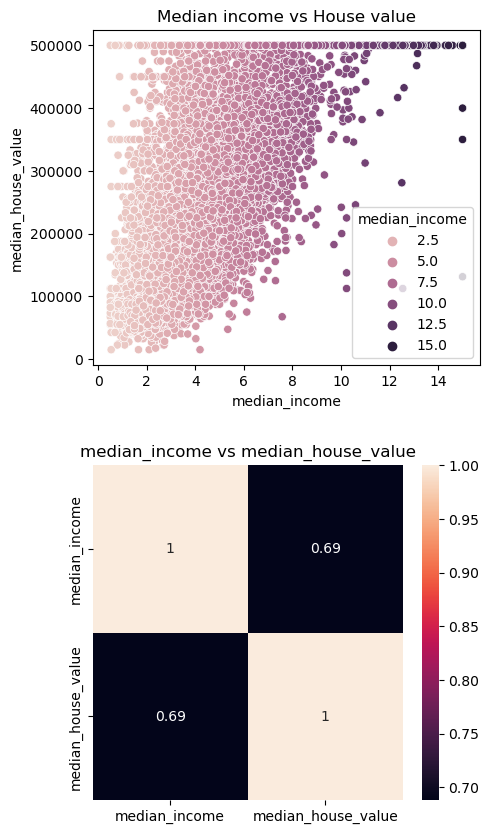

In [6]:
fig,ax=plt.subplots(2,1,figsize=(5,10))  # created a subplot with two rows and 1 column 
sns.scatterplot(x='median_income',y="median_house_value",data=df,hue='median_income',ax=ax[0])
ax[0].set_xlabel('median_income')
ax[0].set_ylabel('median_house_value')
ax[0].set_title("Median income vs House value")
sns.heatmap(data=df[['median_income','median_house_value']].corr(),annot=True,ax=ax[1])
ax[1].set_title('median_income vs median_house_value')
plt.subplots_adjust(hspace=0.3)
plt.show()

It shows the positive correlation as it can be seen median income and median house value is directly proportional

Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
newdf=df.dropna(subset=["total_bedrooms"])


In [10]:
newdf.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [12]:
newdf = newdf.reset_index(drop=True)

In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [14]:
mean_value=df["total_bedrooms"].mean()
mean_value

537.8705525375618

In [15]:
new_df=df["total_bedrooms"].fillna(mean_value,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [17]:
def median_value(df,column_name):
    if df[column_name].dtype == 'int64' or df[column_name].dtype=='float64':
        return df[column_name].median()
    else:
        return "non numeric datatype"

7. Plot latitude versus longitude and explain your observations.,cmap="cool"

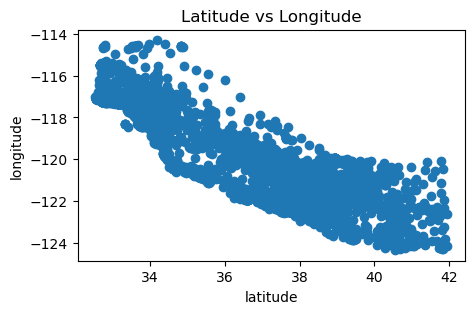

In [18]:
plt.figure(figsize=(5,3))
plt.scatter(x=df["latitude"],y=df["longitude"])
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Latitude vs Longitude")
plt.show()

It shows negative correlation as latitude and longitude in inversely proportional

8. Create a data set for which the ocean_proximity is ‘Near ocean’.

In [19]:
ocean_df=df[df["ocean_proximity"]== "NEAR OCEAN"]
ocean_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


9 Find the mean and median of the median income for the data set created in question 8.

In [20]:
mean_income=ocean_df['median_income'].mean()
mean_income

4.005784800601957

In [21]:
median_income=ocean_df['median_income'].median()
median_income

3.64705

10 Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [22]:
df.loc[df["total_bedrooms"]<=10,"total_bedroom_size"]='Small'
df.loc[df["total_bedrooms"]<=1000,"total_bedroom_size"]='Medium'
df.loc[df["total_bedrooms"]>=1000,"total_bedroom_size"]='Large'
df.head(25)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,Medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,Large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,Medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,Medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,Medium
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,Medium
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,Medium
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY,Medium
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,Medium
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY,Medium
